In [830]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Linear regression with one variable

In [831]:
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [832]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [833]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


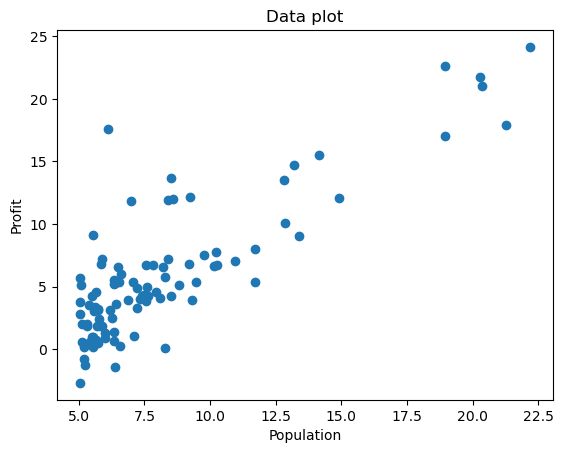

In [834]:
x = data.values[:, 0]
y = data.values[:, 1]
plt.scatter(x, y)
plt.title('Data plot')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

In [835]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [836]:
def h(X, theta):
    return theta.T @ X

def computeCost(X, y, theta):
    return ((h(X, theta) - y)**2).sum() / 2 / X.shape[1]

In [837]:
computeCost(X, y, theta)

32.072733877455676

In [838]:
def simple_gradient(X, y, theta, alpha, it):
    cost = []
    for _ in range(it):
        theta[0, 0] = theta[0, 0] - alpha * (h(X, theta) - y).sum() / X.shape[1]
        theta[1, 0] = theta[1, 0] - alpha * ((h(X, theta) - y) @ X[1, :]).sum() / X.shape[1]
        cost.append(computeCost(X, y, theta))
    return theta, cost

In [839]:
theta, cost = simple_gradient(X, y, theta, alpha=0.01, it=1000)
theta

array([[-3.2508821],
       [ 1.1283631]], dtype=float32)

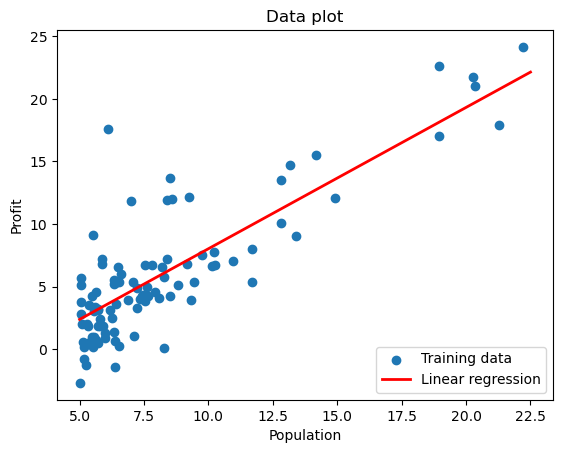

In [840]:
x = data.values[:, 0]
y = data.values[:, 1]
reg = np.linspace(5, 22.5)
plt.scatter(x, y, label='Training data')
plt.plot(reg, reg * theta[1] + theta[0], label='Linear regression', color='red', linewidth='2')
plt.title('Data plot')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend(loc='lower right')
plt.show()

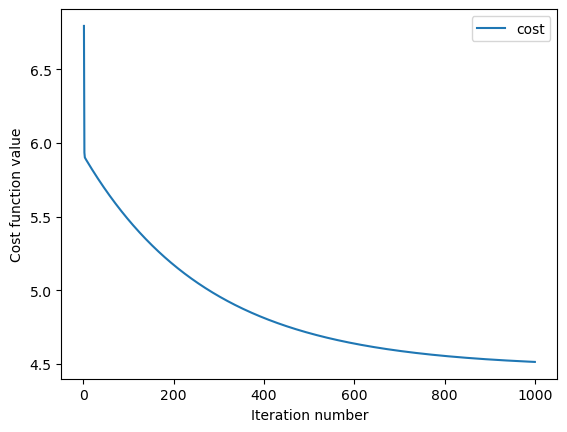

In [841]:
plt.plot(np.linspace(1, 1000, 1000), cost, label='cost')
plt.xlabel('Iteration number')
plt.ylabel('Cost function value')
plt.legend()
plt.show()

Linear regression with multiple variables

In [842]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [843]:
x1 = data2.values[:, 0]
x2 = data2.values[:, 1]
y = data2.values[:, 2]

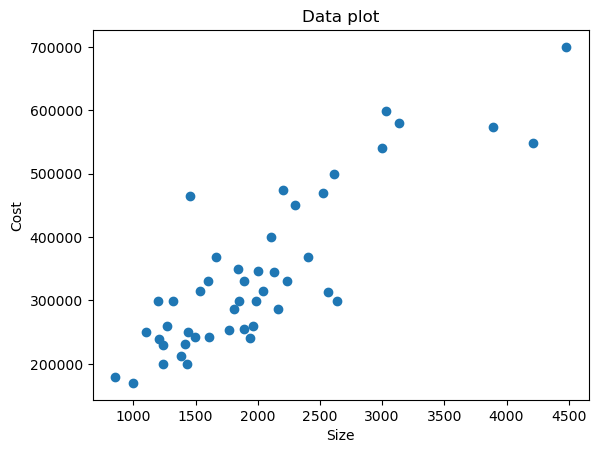

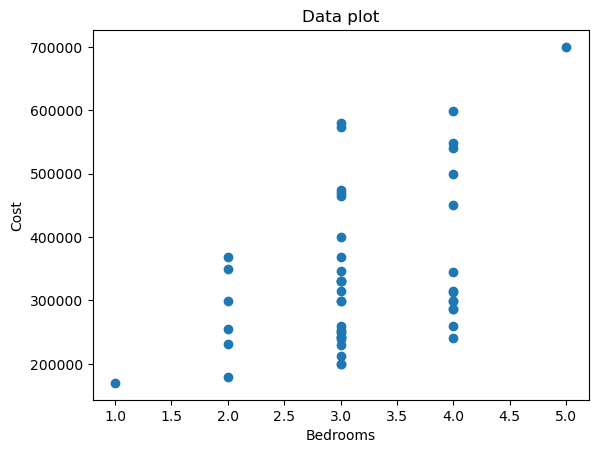

In [844]:
plt.scatter(x1, y)
plt.title('Data plot')
plt.xlabel('Size')
plt.ylabel('Cost')
plt.show()

plt.scatter(x2, y)
plt.title('Data plot')
plt.xlabel('Bedrooms')
plt.ylabel('Cost')
plt.show()

In [845]:
x1_norm = (x1 - x1.mean()) / x1.std()
x2_norm = (x2 - x2.mean()) / x2.std()
y_norm = (y - y.mean()) / y.std()

In [846]:
X = np.stack([np.ones(x1_norm.shape, dtype=np.float32), x1_norm, x2_norm], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [847]:
def h(X, theta):
    return theta.T @ X

def computeCost(X, y, theta):
    return ((h(X, theta) - y)**2).sum() / 2 / X.shape[1]

In [848]:
computeCost(X, y_norm, theta)

0.5

In [849]:
def simple_gradient(X, y, theta, alpha, it):
    cost = []
    for _ in range(it):
        theta[0, 0] = theta[0, 0] - alpha * (h(X, theta) - y).sum() / X.shape[1]
        theta[1, 0] = theta[1, 0] - alpha * ((h(X, theta) - y) @ X[1, :]).sum() / X.shape[1]
        theta[2, 0] = theta[2, 0] - alpha * ((h(X, theta) - y) @ X[2, :]).sum() / X.shape[1]
        cost.append(computeCost(X, y, theta))
    return theta, cost

In [850]:
theta, cost = simple_gradient(X, y_norm, theta, alpha=0.01, it=1000)
theta

array([[-8.3556081e-17],
       [ 8.7914920e-01],
       [-4.7574684e-02]], dtype=float32)

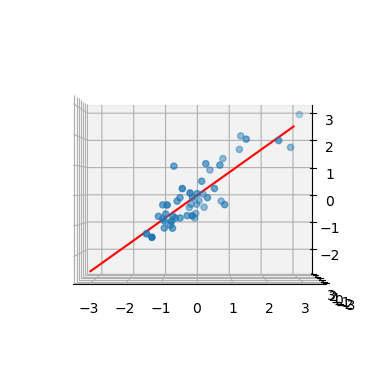

In [851]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1_norm, x2_norm, y_norm)
ax.plot(np.linspace(-3, 3), np.linspace(-3, 3), theta[0] + theta[1] * np.linspace(-3, 3) + theta[2] * np.linspace(-3, 3), 'r')
ax.view_init(0,-90)
plt.show()

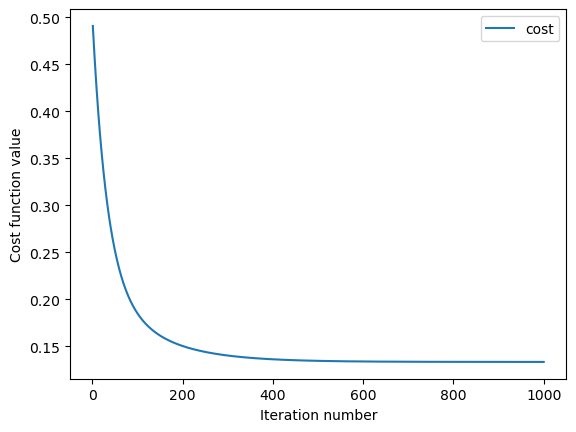

In [852]:
plt.plot(np.linspace(1, 1000, 1000), cost, label='cost')
plt.xlabel('Iteration number')
plt.ylabel('Cost function value')
plt.legend()
plt.show()